In [ ]:
# "healthcare dataset" from kaggle 
import pandas as pd 
df = pd.read_csv('/dbfs/FileStore/tables/modified_healthcare_dataset.csv') 
spark.createDataFrame(df).createOrReplaceTempView("healthcare") 
display(spark.sql("select * from healthcare limit 10")) 

Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
Bobby Jackson,19,Female,AB+,Infections,2024-01-31,Matthew Smith,Northwestern Memorial Hospital,Blue Cross,2212.272701009033,328,Emergency,2024-02-07,Azithromycin,Normal,7
Leslie Terry,15,Female,B-,Flu,2019-08-20,Samantha Davies,UI Health (University of Illinois Hospital),UnitedHealthcare,3185.1613882514152,265,Emergency,2019-08-22,Tamiflu,Abnormal,2
Danny Smith,50,Female,A+,Cancer,2022-09-22,Tiffany Mitchell,UI Health (University of Illinois Hospital),Blue Cross,72055.21406461025,205,Elective,2022-10-30,Cisplatin,Inconclusive,38
Andrew Watts,24,Female,O+,Asthma,2020-11-18,Kevin Wells,UI Health (University of Illinois Hospital),Aetna,4092.6012288418815,450,Elective,2020-11-19,Prednisone,Normal,1
Adrienne Bell,80,Female,A+,Heart Disease,2022-09-19,Kathleen Hanna,Northwestern Memorial Hospital,Cigna,47985.66025413804,458,Routine,2022-10-27,Beta-blockers,Inconclusive,38
Emily Johnson,90,Male,O+,Alzheimer’s,2023-12-20,Taylor Newton,UI Health (University of Illinois Hospital),Medicare,37140.3664236636,389,Routine,2024-03-18,Donepezil,Abnormal,89
Edward Edwards,35,Female,O+,Flu,2020-11-03,Kelly Olson,UChicago Medicine,Cigna,557.6973227502654,389,Emergency,2020-11-05,Zanamivir,Normal,2
Christina Martinez,12,Female,O+,Infections,2021-12-28,Suzanne Thomas,Northwestern Memorial Hospital,UnitedHealthcare,4180.642895552702,277,Routine,2021-12-31,Azithromycin,Abnormal,3
Jasmine Aguilar,54,Male,O-,Heart Disease,2020-07-01,Daniel Ferguson,Loyola University Medical Center,Medicare,31688.559767103965,316,Emergency,2020-08-02,Aspirin,Inconclusive,32
Christopher Berg,65,Male,O+,Cancer,2021-05-23,Heather Day,Northwestern Memorial Hospital,Aetna,52910.75371797836,249,Emergency,2021-07-11,Cisplatin,Inconclusive,49


Name,Billing Amount,dr
Jeffrey Patel,99997.79797710298,1
Carol Lopez,99966.951966995,2
Melinda Tanner,99957.5197275234,3
Marcus Zamora,99951.56314126584,4
Kristin Jennings,99944.7526234275,5


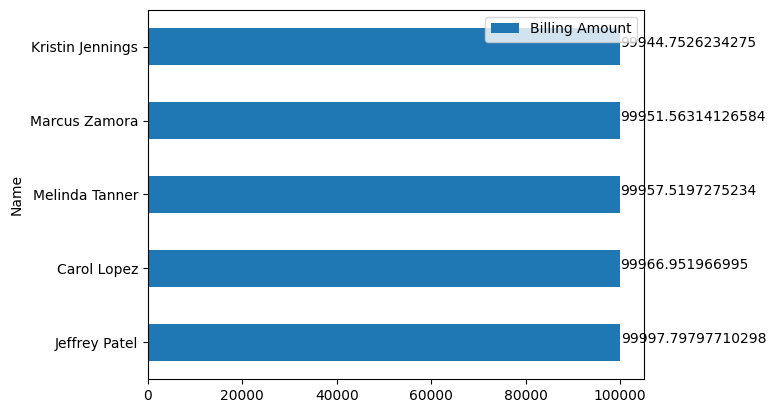

In [ ]:
# Top Patient Expenditure 
import matplotlib.pyplot as plt 
cte = spark.sql("select Name, `Billing Amount`, dense_rank() over(order by `Billing Amount` desc) as dr from healthcare") 

cte.createOrReplaceTempView("cte")

df = (spark.sql("select * from cte where dr<=5")) 
# display(df)
df = df.toPandas() 
df.plot(kind='barh', x='Name', y='Billing Amount') 

for i, v in enumerate(df['Billing Amount']): 
    plt.text(v+100, i, str(v)) 
display(df)

# df = spark.sql("select * from cte where dr<=5"); 

# display(df); 
# df.toPandas().plot(kind='barh', x='Name', y='Billing Amount') 

Test Results,No. of Test Results
Inconclusive,10263
Abnormal,27784
Normal,17453


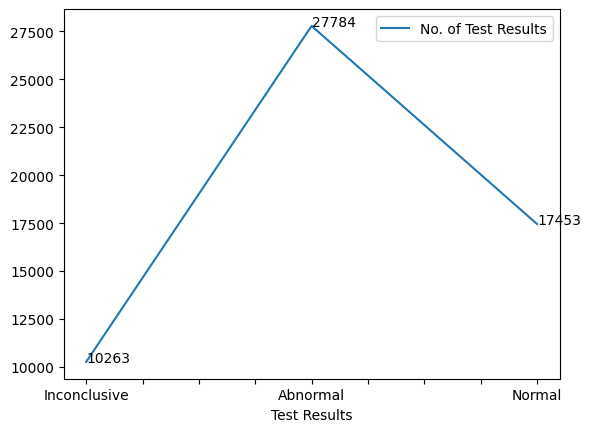

In [ ]:
# Summary of Test Results Frequencies 
import matplotlib.pyplot as plt 
df = (spark.sql("select `Test Results`, count(`Test Results`) as `No. of Test Results` from healthcare group by `Test Results`")) 
# display(df) 
df = df.toPandas() 
df.plot(kind='line', x='Test Results', y='No. of Test Results') 

for i, v in enumerate(df['No. of Test Results']): 
    plt.text(i, v+4, str(v)) 
display(df) 

<Axes: ylabel='Medical Condition'>

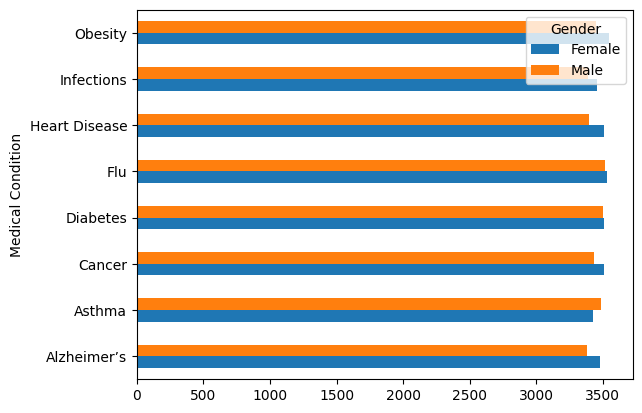

In [ ]:
# Patient Distribution: Medical Condition by Gender 
import matplotlib.pyplot as plt 

# display(spark.sql("select count(*) from healthcare where `Medical Condition` = 'Cancer'")) 
df = (spark.sql("select count(*) as total, Gender, `Medical Condition` from healthcare group by 2, 3 order by 3")) 
# display(df) 
df_pivot = df.toPandas().pivot(index='Medical Condition', columns='Gender', values='total'); 
df_pivot.plot(kind='barh') 

# for i, v in enumerate(df_pivot.values.flatten()): 
#     plt.text(v+100, i, str(v)) 
# display(df_pivot) 

# display values for each bar in the plot
# df_pivot.plot(kind='barh', figsize=(10,4))
# for i, v in enumerate(df_pivot.values.flatten()):
#     plt.text(v, i, str(v), color='black', va='center') 


Hospital,No. of Patients
Northwestern Memorial Hospital,21
UI Health (University of Illinois Hospital),21
Loyola University Medical Center,24
UChicago Medicine,25


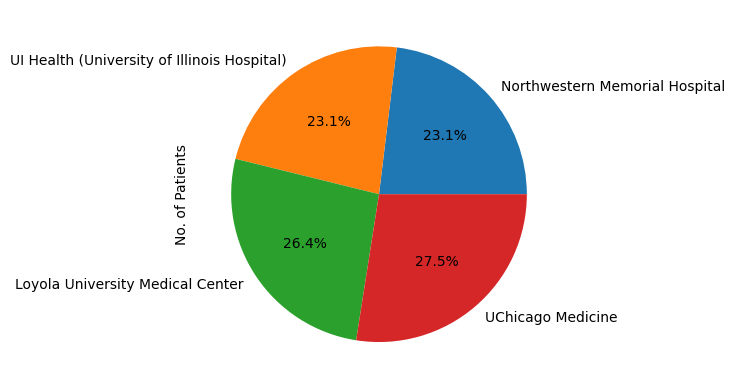

In [ ]:
# Patients having longer stay in hospital 
cte = (spark.sql("select Name, Hospital, `Length of Stay` from healthcare where `Length of Stay` = (select max(`Length of Stay`) from healthcare)")) 

cte.createOrReplaceTempView("cte") 

# df = (spark.sql("select Hospital, count(Hospital) as `No. of Patients` from cte group by 1 order by 2 asc"))
# display(df) 
df_pie = df.toPandas()
df_pie.plot(kind='pie', y='No. of Patients', autopct = '%1.1f%%', labels=df_pie['Hospital'], legend=False) 
display(df_pie) 

Blood Type,most frequent blood type
AB+,3239
O+,15696
AB-,4485
A-,3301
O-,3341
B+,5457
A+,15573
B-,4408


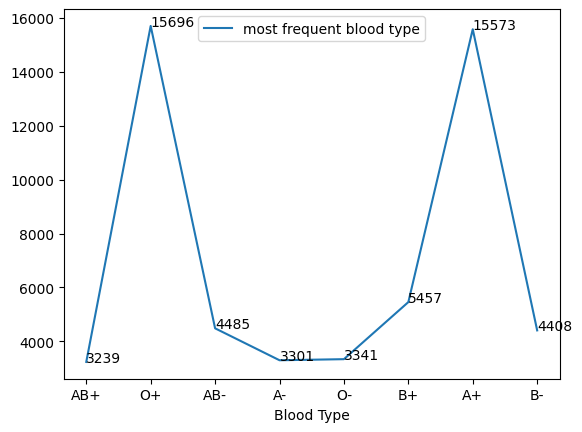

In [ ]:
# Most frequent blood type in patients 
import matplotlib.pyplot as plt 
df = (spark.sql("select `Blood Type`, count(`Blood Type`) as `most frequent blood type` from healthcare group by 1")) 
df = df.toPandas() 
df.plot(kind='line', x='Blood Type', y='most frequent blood type') 

# for i, v in enumerate(df['most frequent blood type']): 
#     plt.text(i, v + 3, str(v), color='black', ha='center') 
# display(df) 

for i, v in enumerate(df['most frequent blood type']): 
    plt.text(i, v+10, str(v)) 
display(df) 

Age,total,dr
62,250,1
52,248,2
73,246,3
66,242,4
76,239,5


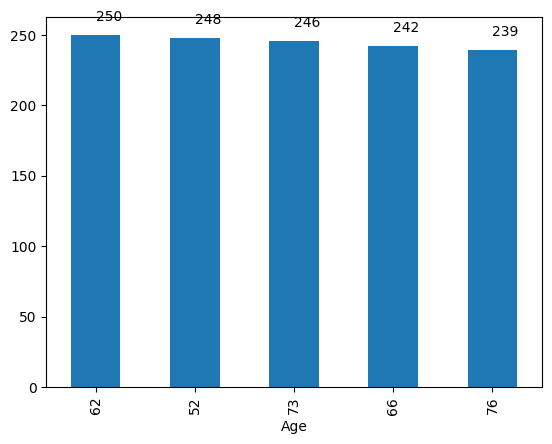

In [ ]:
# Top Age Demographics for Cancer Cases 
cte = (spark.sql("select `Age`, count(*) as total, dense_rank() over(order by count(*) desc) as dr from healthcare where `Medical Condition` = 'Cancer' group by 1")) 

# display(cte) 
cte.createOrReplaceTempView("cte") 

df = (spark.sql("select * from cte where dr<=5")) 

# df = (spark.sql("select * from cte where total = (select max(total) from cte)")) 
# display(df) 
# df.toPandas() 
# df.plot(kind='bar', x='Age', y='total') 

df.toPandas().plot(kind='bar', x='Age', y='total', legend=False) 
# display(df) 

for i, v in enumerate(df.toPandas()['total']): 
    plt.text(i, v+10, str(v)) 
display(df) 

Medical Condition,total_pateints
Infections,3488
Flu,2785
Obesity,678
Heart Disease,3465
Diabetes,2094
Cancer,1379
Alzheimer’s,2083
Asthma,4132


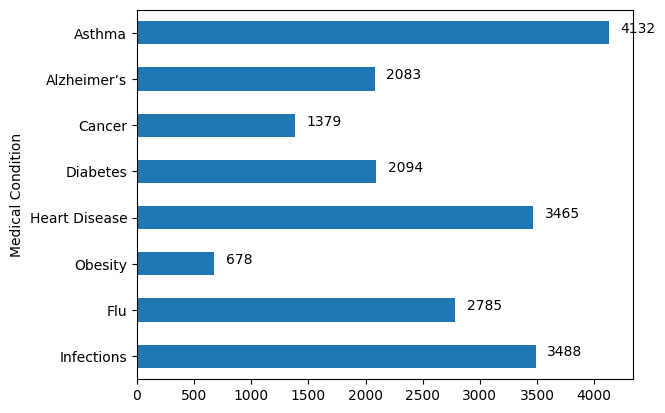

In [ ]:
# Distribution of Medical Condition in Emergency Admissions 
df = (spark.sql("select `Medical Condition`, count(*) as total_pateints from healthcare where `Admission Type` = 'Emergency' group by 1")) 

df = df.toPandas()
df.plot(kind='barh', x='Medical Condition', y='total_pateints', legend=False) 
# display(df) 

for i, v in enumerate(df['total_pateints']): 
    plt.text(v+100, i, str(v)) 
display(df) 

<Axes: ylabel='count(Name)'>

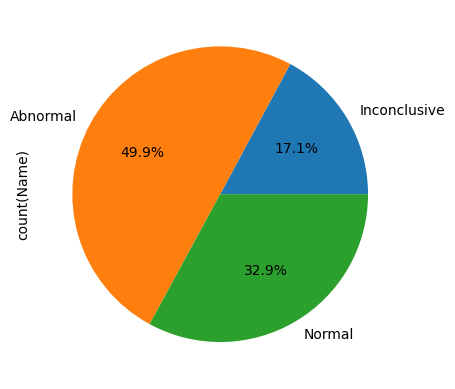

In [ ]:
# Emergency Admissions: Test Results Breakdown 
df = (spark.sql("select `Test Results`, count(Name) from healthcare where `Admission Type` = 'Emergency' group by 1")) 

df.toPandas().plot(kind='pie', y='count(Name)', autopct = '%1.1f%%', labels=df.toPandas()['Test Results'], legend=False) 


Medication,count of medication
Metformin,4653
Zanamivir,2391
Methotrexate,2375
Glipizide,2362
Orlistat,2351
Insulin,2340
Aspirin,2337
Prednisone,2333
Oseltamivir,2329
Tamiflu,2326


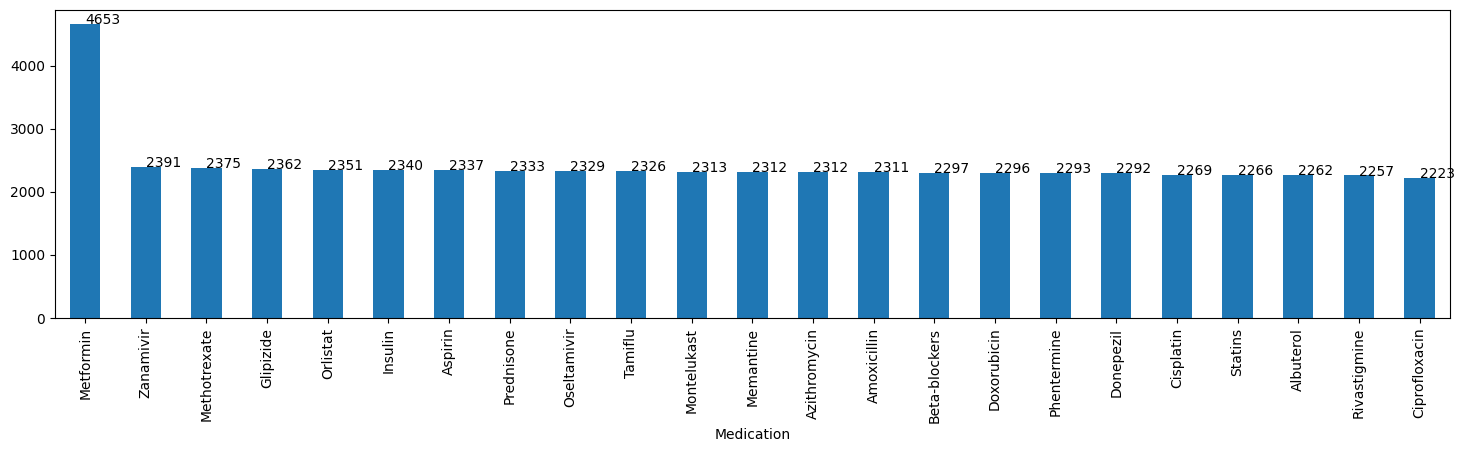

In [ ]:
# Medication Usage Analysis 
df = (spark.sql("select Medication, count(*) as `count of medication` from healthcare group by 1 order by 2 desc")) 

df = df.toPandas()
df.plot(kind='bar', y='count of medication', x='Medication', figsize=(18,4), legend=False) 

for i, v in enumerate(df['count of medication']): 
    plt.text(i, v+3, str(v))
display(df) 


<Axes: ylabel='total'>

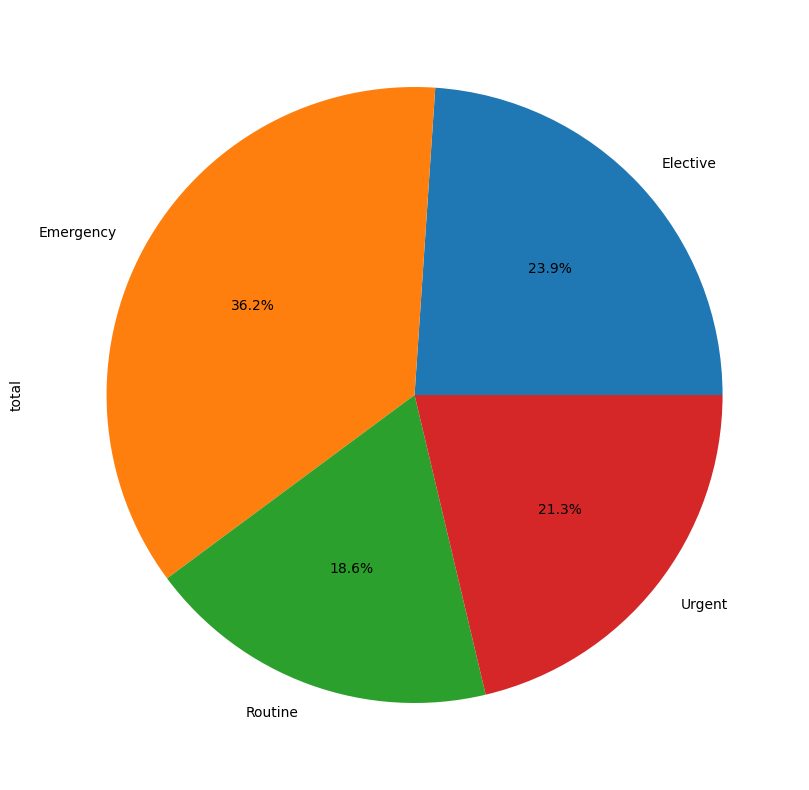

In [ ]:
# Statistical Breakdown of Patient Admission Types 
df = (spark.sql("select `Admission Type`, count(Name) as total from healthcare group by 1")) 

df.toPandas().plot(kind='pie', y='total', autopct='%1.1f%%', legend=False, labels=df.toPandas()['Admission Type'], figsize=(10, 10)) 

Date of Admission,total
2019,921
2020,1374
2021,1362
2022,1366
2023,1416
2024,501


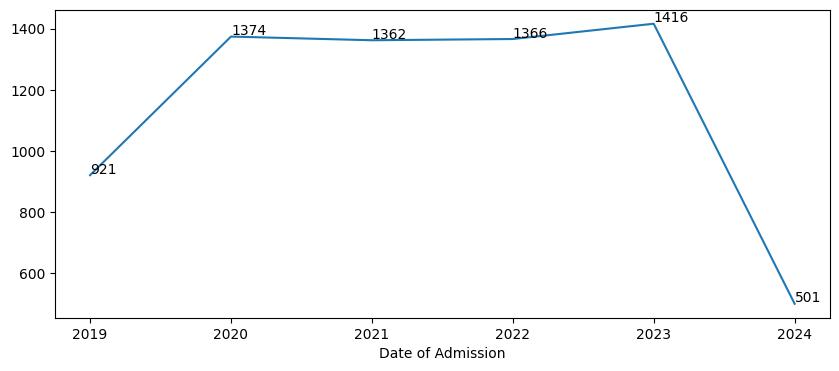

In [ ]:
# Show the trend chart for cancer patients over the yrs. 

import matplotlib.pyplot as plt
df = (spark.sql("select year(`Date of Admission`) as `Date of Admission`, count(*) as total from healthcare where `Medical Condition` = 'Cancer' group by 1 order by 1")) 

df = df.toPandas()
df.plot(kind='line', y='total', x='Date of Admission', figsize=(10,4), legend=False) 

for i, v in zip(df['Date of Admission'], df['total']): 
    plt.text(i, v+5, str(v)) 
display(df) 